#Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
start_date = "2018-01-01"
end_date = "2023-01-01"
df= yf.download("BTC-USD", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [ ]:
outliers=[]
def detect_outliers(att):
  threshold=3
  mean = np.mean(att)
  std =np. std(att)
  for i in att:
    z_score= (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [ ]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

In [ ]:
for k in range(len(numeric_columns)):
    at=numeric_columns[k]
    att=df[at]
    print(at," : ",detect_outliers(att))

Open  :  []
High  :  []
Low  :  []
Close  :  []
Adj Close  :  []


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999306,0.998687,0.998230,0.998230,0.555191
High,0.999306,1.000000,0.998580,0.999207,0.999207,0.561670
Low,0.998687,0.998580,1.000000,0.999095,0.999095,0.541639
Close,0.998230,0.999207,0.999095,1.000000,1.000000,0.552921
Adj Close,0.998230,0.999207,0.999095,1.000000,1.000000,0.552921
Volume,0.555191,0.561670,0.541639,0.552921,0.552921,1.000000


In [ ]:
def duplicates(data):
  duplicate_count = data.duplicated().sum()

  if duplicate_count > 0:
      print(f"There are {duplicate_count} duplicate rows in the dataset.")
  else:
      print("There are no duplicate rows in the dataset.")



In [ ]:
for i in numeric_columns:
  duplicates(df[i])

There are no duplicate rows in the dataset.
There are 1 duplicate rows in the dataset.
There are no duplicate rows in the dataset.
There are 1 duplicate rows in the dataset.
There are 1 duplicate rows in the dataset.


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,20339.679542,20839.385473,19772.518018,20338.668578,20338.668578,2.660078e+10
std,16990.993208,17435.085779,16475.643407,16986.017527,16986.017527,1.982447e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7686.926270,7908.665894,7517.305298,7682.069092,7682.069092,1.273287e+10
50%,10966.993652,11301.309570,10652.977539,10960.592285,10960.592285,2.432325e+10
75%,33789.308594,34790.409180,32267.986816,33740.259766,33740.259766,3.580401e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=df.dropna()

In [ ]:
X = df[['Open','Close', 'Adj Close', 'Low']]
y = df['High']

In [ ]:
scaler = StandardScaler()

#Train and Test Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.02917409, -0.02279536, -0.02279536,  0.008135  ],
       [ 2.25261228,  2.10900187,  2.10900187,  2.17353191],
       [ 0.93494933,  0.95649041,  0.95649041,  0.81115223],
       ...,
       [-0.02286478, -0.06075128, -0.06075128, -0.02917139],
       [-0.52743204, -0.59300635, -0.59300635, -0.57870429],
       [-0.69718974, -0.69310205, -0.69310205, -0.68532914]])

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score

In [ ]:
model = LinearRegression()

In [ ]:
def linear(X_train_scaled,X_test_scaled,y_train,y_test):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  print(y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  # Calculate R-squared
  r2 = r2_score(y_test, y_pred)
  print("R-squared:", r2)

  #Calculate Mean_absolute_error
  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Error (MAE):", mae)

  #Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print("Mean Absolute Percentage Error (MAPE):", mape, "%")

  #Calculate Median Absolute Error
  median_absolute_error = np.median(np.abs(y_test - y_pred))
  print("Median Absolute Error:", median_absolute_error)

  #Calculate Explained Variance Score
  evs = explained_variance_score(y_test, y_pred)
  print("Explained Variance Score:", evs)
  return y_pred

In [ ]:
x=linear(X_train_scaled,X_test_scaled,y_train,y_test)

[ 8910.3404262   8762.96827371  9577.81632317  5882.96823028
 10003.19959399  9770.20463868  3337.22916671 19436.23803328
  5351.83490344 17564.42244564  8991.27014279 24075.07275123
 42792.33904565  6456.13643349  9799.24487883 50122.76117218
  4143.74532562  6651.3875211  10616.39528342 39155.57242164
  7137.94550372  6562.47538581  8612.54148629 11050.84799735
  6440.50997831 11636.64403394  8464.37875487 10749.80177792
 19699.15725496 66203.31374762 17114.80146698 17251.13734741
 10635.57877797 47954.07638983 11698.10543999  5459.22475076
 35303.51462286 40206.65248906 43936.03982685 16721.37876172
 65738.12612909 57106.17143955  6322.92909028 58314.22046427
 50932.46678528 10736.65379153 10084.27194729 38876.52243316
  9699.62231147 11803.11890041 47200.00237656 39478.22741385
 34094.80199363 40417.63040815  9246.15715664  4462.10970356
 10016.82518017 10724.31232589 43861.29240164  8222.6414367
  6995.31776178  9546.70562737 50022.48829487  3610.87464585
 19724.44369703 19785.358

In [ ]:
x = pd.DataFrame(x)
x=x.set_index(y_test.index)
x=x.sort_index()

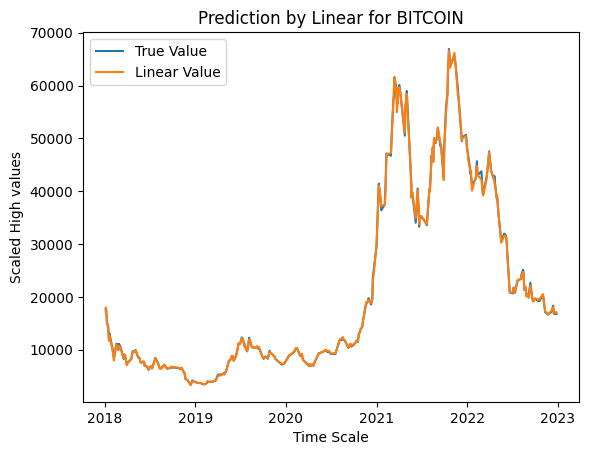

In [ ]:
plt.plot(y_test.sort_index(), label="True Value")
plt.plot(x, label="Linear Value")
plt.title("Prediction by Linear for BITCOIN")
plt.xlabel("Time Scale")
plt.ylabel("Scaled High values")
plt.legend()
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
def randomforest(X_train_scaled,X_test_scaled,y_train,y_test):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  print(y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  # Calculate R-squared
  r2 = r2_score(y_test, y_pred)
  print("R-squared:", r2)

  #Calculate Mean_absolute_error
  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Error (MAE):", mae)

  #Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print("Mean Absolute Percentage Error (MAPE):", mape, "%")

  #Calculate Median Absolute Error
  median_absolute_error = np.median(np.abs(y_test - y_pred))
  print("Median Absolute Error:", median_absolute_error)

  #Calculate Explained Variance Score
  evs = explained_variance_score(y_test, y_pred)
  print("Explained Variance Score:", evs)
  return y_pred

In [ ]:
x=randomforest(X_train_scaled,X_test_scaled,y_train,y_test)

[ 8858.65825195  8861.96530273  9482.89913086  5713.50743652
  9976.77711914  9705.80886719  3325.60558838 19400.74552734
  5326.42471191 17260.40773437  8914.12864258 24138.76642578
 42603.48851563  6471.04562012  9693.30679688 49999.80195313
  4141.13898682  6681.54493652 10531.28342773 39088.24136719
  7130.61303711  6503.01378906  8630.23541992 10842.06883789
  6434.95904297 11583.81211914  8445.4574707  10938.09719727
 19624.22148438 66166.44722656 16921.09742188 17030.0446875
 10582.16794922 48048.7659375  11711.93255859  5446.57194824
 35501.98578125 40080.29960937 43818.27265625 16693.76063477
 65025.32117188 57596.81578125  6336.12878418 58034.34109375
 50616.61886719 10733.05055664 10175.40992187 38961.89039062
  9569.88476562 11747.19229492 46534.82882812 39666.24027344
 33699.29585938 39955.5065625   9383.68248047  4628.83415039
  9959.77179688 10755.676875   41504.86914062  8216.82029297
  6954.42494141  9465.88914063 50708.89320313  3619.24855957
 19489.30292969 20349.643

In [ ]:
x = pd.DataFrame(x)
x=x.set_index(y_test.index)
x=x.sort_index()

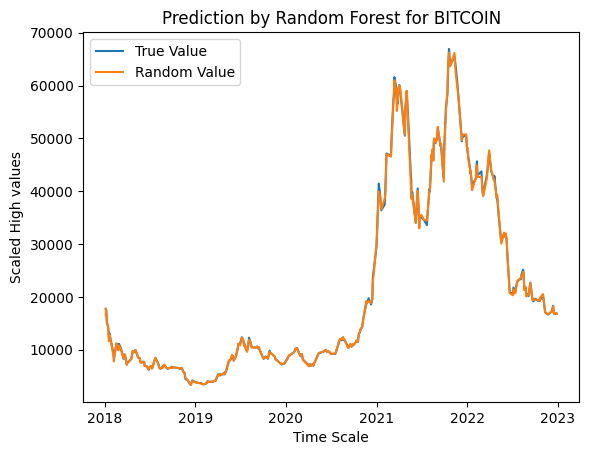

In [ ]:
plt.plot(y_test.sort_index(), label="True Value")
plt.plot(x, label="Random Value")
plt.title("Prediction by Random Forest for BITCOIN")
plt.xlabel("Time Scale")
plt.ylabel("Scaled High values")
plt.legend()
plt.show()

#XG Boost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, random_state=0)

In [ ]:

def xgboost(X_train_scaled,X_test_scaled,y_train,y_test):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  print(y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  # Calculate R-squared
  r2 = r2_score(y_test, y_pred)
  print("R-squared:", r2)

  #Calculate Mean_absolute_error
  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Error (MAE):", mae)

  #Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print("Mean Absolute Percentage Error (MAPE):", mape, "%")

  #Calculate Median Absolute Error
  median_absolute_error = np.median(np.abs(y_test - y_pred))
  print("Median Absolute Error:", median_absolute_error)

  #Calculate Explained Variance Score
  evs = explained_variance_score(y_test, y_pred)
  print("Explained Variance Score:", evs)
  return y_pred

In [ ]:
x=xgboost(X_train_scaled,X_test_scaled,y_train,y_test)

[ 8888.998   8845.702   9490.015   5835.055   9844.57    9657.573
  3480.6106 19386.      5369.6567 17375.014   8928.374  24279.082
 42828.12    6482.9473  9805.16   50187.918   4200.7915  6686.91
 10563.674  39353.715   7079.411   6515.0337  8489.738  10731.114
  6482.9473 11575.814   8450.097  10968.439  19543.307  65650.55
 16875.729  16925.951  10546.466  47929.496  11709.783   5390.571
 35448.637  39974.477  44115.83   16656.018  64769.902  57120.8
  6441.8735 58010.31   51775.77   10968.439  10158.361  38854.117
  9624.537  11648.03   46843.91   39466.21   34049.715  40437.39
  9349.104   4612.789   9844.57   10650.821  41354.18    8208.362
  7022.453   9474.83   50274.867   3628.717  19426.61   20189.66
 45244.12   38733.32   36887.12    9470.93    6593.151  11545.859
 38440.36    9082.861  19351.514   9241.334  58327.777   7215.5376
 29976.996  10926.779   7352.355  48958.78   18087.86   23829.127
 10911.982   4153.3896 40258.027   9832.643  22681.67    6557.1606
  7954.2524 55

In [ ]:
x = pd.DataFrame(x)
x=x.set_index(y_test.index)
x=x.sort_index()

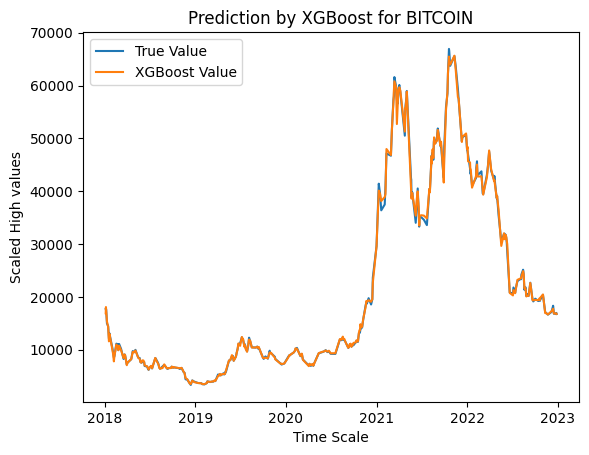

In [ ]:
plt.plot(y_test.sort_index(), label="True Value")
plt.plot(x, label="XGBoost Value")
plt.title("Prediction by XGBoost for BITCOIN")
plt.xlabel("Time Scale")
plt.ylabel("Scaled High values")
plt.legend()
plt.show()

#Model Recommendation

As per the prediction graphs of all the models, linear regression has the better predictive analysis than other models.

So, I would recommend to use Linear Regression Model